In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.model_selection import train_test_split
import cv2
from cv2 import imread,imwrite,resize
from skimage.feature import graycomatrix, graycoprops
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#load dataset function
def load_data(root):
    dict_img = {}
    for dir in os.listdir(root):
        img = Image.open(os.path.join(root, dir, os.listdir(os.path.join(root, dir))[0]))
        print(img.size)
        dict_img[dir] = len(os.listdir(os.path.join(root, dir)))
    return dict_img


In [ ]:
#plot sample from dataset function
def plot_first_img_from_each_dir(root):
  dict_img = load_data(root)
  fig, ax = plt.subplots(1, len(dict_img), figsize=(10, 5))
  for i, dir in enumerate(dict_img):
    img = Image.open(os.path.join(root, dir, os.listdir(os.path.join(root, dir))[0]))
    ax[i].imshow(img)
    ax[i].set_title(dir)
  plt.show()


In [ ]:
#load original dataset
root =  '/content/drive/MyDrive/dataset'


(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)


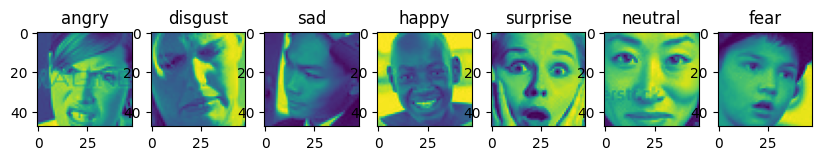

In [ ]:
#plot first image from each directory
plot_first_img_from_each_dir(root)

In [ ]:
#  copy from dataset and resize images of all folders and convert to gray
new_root = '/content/drive/MyDrive/dataset_new'

for dir in load_data(root):
  os.makedirs(os.path.join(new_root, dir), exist_ok=True)
  for img_name in os.listdir(os.path.join(root, dir)):
    img = imread(os.path.join(root, dir, img_name))
    new_img = resize(img, (250, 250))
    new_img = cv2.cvtColor(new_img, cv2.COLOR_BGR2RGB)
    imwrite(os.path.join(new_root, dir, img_name), new_img)


(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)


(250, 250)
(250, 250)
(250, 250)
(250, 250)
(250, 250)
(250, 250)
(250, 250)


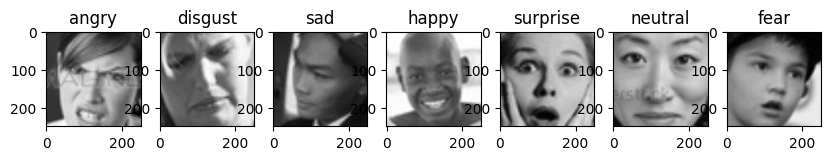

In [ ]:
plot_first_img_from_each_dir(new_root)

In [ ]:
sized="/content/drive/MyDrive/dataset_new"
def enhance_images(root):
  new_root = '/content/drive/MyDrive/dataset_new_enhanced'
  for dir in load_data(root):
    os.makedirs(os.path.join(new_root, dir), exist_ok=True)
    for img_name in os.listdir(os.path.join(root, dir)):
      img = imread(os.path.join(root, dir, img_name))
      #convert to grayscale
      gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
      #remove blur
      kernel = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])
      sharpened = cv2.filter2D(gray_img, -1, kernel)
      #convert back to rgb
      new_img = cv2.cvtColor(sharpened, cv2.COLOR_GRAY2RGB)
      imwrite(os.path.join(new_root, dir, img_name), new_img)

#call function to enhance images
enhance_images(new_root)


(250, 250)
(250, 250)
(250, 250)
(250, 250)
(250, 250)
(250, 250)
(250, 250)


(250, 250)
(250, 250)
(250, 250)
(250, 250)
(250, 250)
(250, 250)
(250, 250)


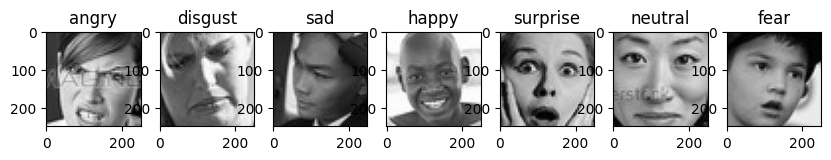

In [ ]:
plot_first_img_from_each_dir('/content/drive/MyDrive/dataset_new_enhanced')

In [ ]:
# perfect segmentation function by findContours
def perfect_segmentation(root):
  new_root = '/content/drive/MyDrive/dataset_new_segmented'
  for dir in load_data(root):
    os.makedirs(os.path.join(new_root, dir), exist_ok=True)
    for img_name in os.listdir(os.path.join(root, dir)):
      img = imread(os.path.join(root, dir, img_name))
      #convert to grayscale
      gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
      #apply thresholding
      ret, thresh = cv2.threshold(gray_img, 127, 255, 0)
      #find contours
      contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
      #draw contours on image
      cv2.drawContours(img, contours, -1, (255, 0, 0), 3)
      imwrite(os.path.join(new_root, dir, img_name), img)

#call function to segment images
perfect_segmentation(new_root)


(250, 250)
(250, 250)
(250, 250)
(250, 250)
(250, 250)
(250, 250)
(250, 250)


(250, 250)
(250, 250)
(250, 250)
(250, 250)
(250, 250)
(250, 250)
(250, 250)


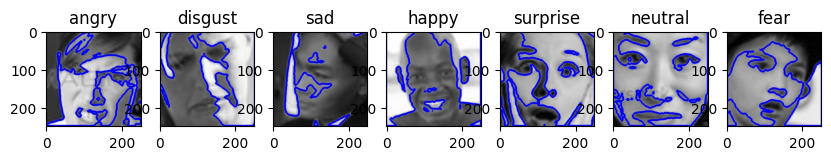

In [ ]:
plot_first_img_from_each_dir('/content/drive/MyDrive/dataset_new_segmented')

In [ ]:
def calculate_features(root):
  new_root = '/content/drive/MyDrive/dataset_new_enhanced'
  for dir in load_data(root):
    os.makedirs(os.path.join(new_root, dir), exist_ok=True)
    for img_name in os.listdir(os.path.join(root, dir)):
      img = imread(os.path.join(root, dir, img_name))
      #convert to grayscale
      gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
      #apply thresholding
      ret, thresh = cv2.threshold(gray_img, 127, 255, 0)
      #find contours
      contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
      #calculate area
      if len(contours) == 0:
        area = 0
      else:
        area = cv2.contourArea(contours[0])
        #calculate perimeter
        perimeter = cv2.arcLength(contours[0], True)
        #calculate compactness
      if area == 0:
        compactness = 0
      else:
        compactness = perimeter**2/area
       # save data to csv file
      df = pd.DataFrame({'area': [area], 'perimeter': [perimeter], 'compactness': [compactness]})
      df.to_csv(os.path.join(new_root, dir, img_name + '.csv'))

    # call function to calculate features
calculate_features(new_root)

(250, 250)
(250, 250)
(250, 250)
(250, 250)
(250, 250)
(250, 250)
(250, 250)


In [ ]:
# feature extraction using GLCM

new_root = '/content/drive/MyDrive/dataset_new_segmented'
def extract_features(root):
  features = []
  labels = []
  for dir in load_data(root):
    for img_name in os.listdir(os.path.join(root, dir)):
      img = imread(os.path.join(root, dir, img_name))
      #convert to grayscale
      gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
      #compute GLCM
      glcm = graycomatrix(gray_img, [1], [0], 256)
      #compute features
      features.append(graycoprops(glcm, 'contrast'))
      labels.append(dir)
      features.append(graycoprops(glcm, 'homogeneity'))
      labels.append(dir)
      features.append(graycoprops(glcm, 'energy'))
      labels.append(dir)
      features.append(graycoprops(glcm, 'correlation'))
      labels.append(dir)

  return features, labels

#extract features
features, labels = extract_features(new_root)

#save features and labels to csv file
features = np.array(features).reshape((700, 4))
df = pd.DataFrame(features)
df['label'] =labels[:700]
df.to_csv('features.csv', index=False)


(250, 250)
(250, 250)
(250, 250)
(250, 250)
(250, 250)
(250, 250)
(250, 250)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#load data from csv file
df = pd.read_csv('features.csv')

#split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('label', axis=1), df['label'], test_size=0.25)

#train model
model = LogisticRegression()
model.fit(X_train, y_train)

#predict labels for test data
y_pred = model.predict(X_test)

#calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

#print accuracy
print('Accuracy:', accuracy)


Accuracy: 0.13714285714285715


In [ ]:
# feature extraction using SIFT
new_root = '/content/drive/MyDrive/dataset_new_segmented'

def extract_features(root):
  features = []
  labels = []
  for dir in load_data(root):
    for img_name in os.listdir(os.path.join(root, dir)):
      img = imread(os.path.join(root, dir, img_name))
      #convert to grayscale
      gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
      #compute SIFT features
      sift = cv2.SIFT_create()
      keypoints, descriptors = sift.detectAndCompute(gray_img, None)
      #add features and labels to list
      features.append(descriptors)
      labels.append(dir)
  return features, labels

#extract features
features, labels = extract_features(new_root)


#save features and labels to csv file
features = np.array(features)
df = pd.DataFrame(features)
df['label'] = labels
df.to_csv('features_sift.csv', index=False)


(250, 250)
(250, 250)
(250, 250)
(250, 250)
(250, 250)
(250, 250)
(250, 250)


<ipython-input-6-c7ea3f32618d>:25: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  features = np.array(features)


In [ ]:
# prompt: find interest points on all images in segmented dataset and save result in new dataset

new_root = '/content/drive/MyDrive/dataset_new_segmented'
def extract_features(root):
  new_root = '/content/drive/MyDrive/dataset_new_segmented_interest_points'
  for dir in load_data(root):
    os.makedirs(os.path.join(new_root, dir), exist_ok=True)
    for img_name in os.listdir(os.path.join(root, dir)):
      img = imread(os.path.join(root, dir, img_name))
      #convert to grayscale
      gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
      #compute SIFT features
      sift = cv2.SIFT_create()
      keypoints, descriptors = sift.detectAndCompute(gray_img, None)
      #draw keypoints on image
      img = cv2.drawKeypoints(gray_img, keypoints, img, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
      imwrite(os.path.join(new_root, dir, img_name), img)

#extract features
extract_features(new_root)


(250, 250)
(250, 250)
(250, 250)
(250, 250)
(250, 250)
(250, 250)
(250, 250)


(250, 250)
(250, 250)
(250, 250)
(250, 250)
(250, 250)
(250, 250)
(250, 250)


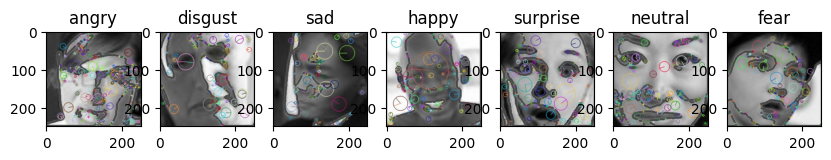

In [ ]:
plot_first_img_from_each_dir('/content/drive/MyDrive/dataset_new_segmented_interest_points')